In [1]:
suppressMessages(library(ArchR))
library(parallel)
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)
suppressMessages(library(Seurat))
suppressMessages(library(SingleCellExperiment))

In [2]:
##################################
### set Arrow File parameters ####
# addArchRThreads(threads = round(parallel::detectCores()*1/4))
addArchRThreads(threads = 1)

##################################
### load rheMac10 ArchR genome ###
GENOMEDIR='/home/bnphan/resources/genomes/rheMac10'
load(file.path(GENOMEDIR,'rheMac10_liftoff_GRCh38.p13_ArchR_annotations.rda'))

Setting default number of Parallel threads to 1.



In [3]:
PROJDIR='../../../data/tidy_data/ArchRProjects'
ARCHDIR=file.path(PROJDIR,'Macaque_scATAC_DorsalHorn_neuron')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [4]:
proj <- addImputeWeights(proj, reducedDims = "HarmonyX60")

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-36e3212e116af-Date-2022-07-18_Time-10-38-42.log
If there is an issue, please report to github with logFile!

2022-07-18 10:38:42 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [5]:
head(getCellColData(proj))

DataFrame with 6 rows and 28 columns
                                        Sample TSSEnrichment ReadsInTSS
                                   <character>     <numeric>  <numeric>
DH-1_SEA1346A1#CAAACCTGATACTTTC DH-1_SEA1346A1        14.364       6572
DH-1_SEA1346A1#CGCGTTGGAGTGGTGA DH-1_SEA1346A1         9.010       3458
DH-1_SEA1346A1#GCATCAATGAGCGCTC DH-1_SEA1346A1        14.883       5667
DH-1_SEA1346A1#CTGTCGTTGCTTCAAG DH-1_SEA1346A1        26.830      11151
DH-1_SEA1346A1#TCGCCGAGATAAGCAA DH-1_SEA1346A1        21.666       9869
DH-1_SEA1346A1#GCAGGTCTGACTAGGG DH-1_SEA1346A1        12.713       6086
                                ReadsInPromoter PromoterRatio    PassQC
                                      <numeric>     <numeric> <numeric>
DH-1_SEA1346A1#CAAACCTGATACTTTC           33398      0.169640         1
DH-1_SEA1346A1#CGCGTTGGAGTGGTGA           20955      0.110136         1
DH-1_SEA1346A1#GCATCAATGAGCGCTC           28640      0.172501         1
DH-1_SEA1346A1#CTGTCGTTGCTT

## Check clusters w/ lower nFrag (dead cells) and doublets

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-36e32328bc00d-Date-2022-07-18_Time-10-39-34.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-36e32328bc00d-Date-2022-07-18_Time-10-39-34.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-36e323a9acfef-Date-2022-07-18_Time-10-39-53.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-36e323a9acfef-Date-2022-07-18_Time-10-39-53.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-36e32db896a2-Date-2022-07-18_Time-10-40-01.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : 

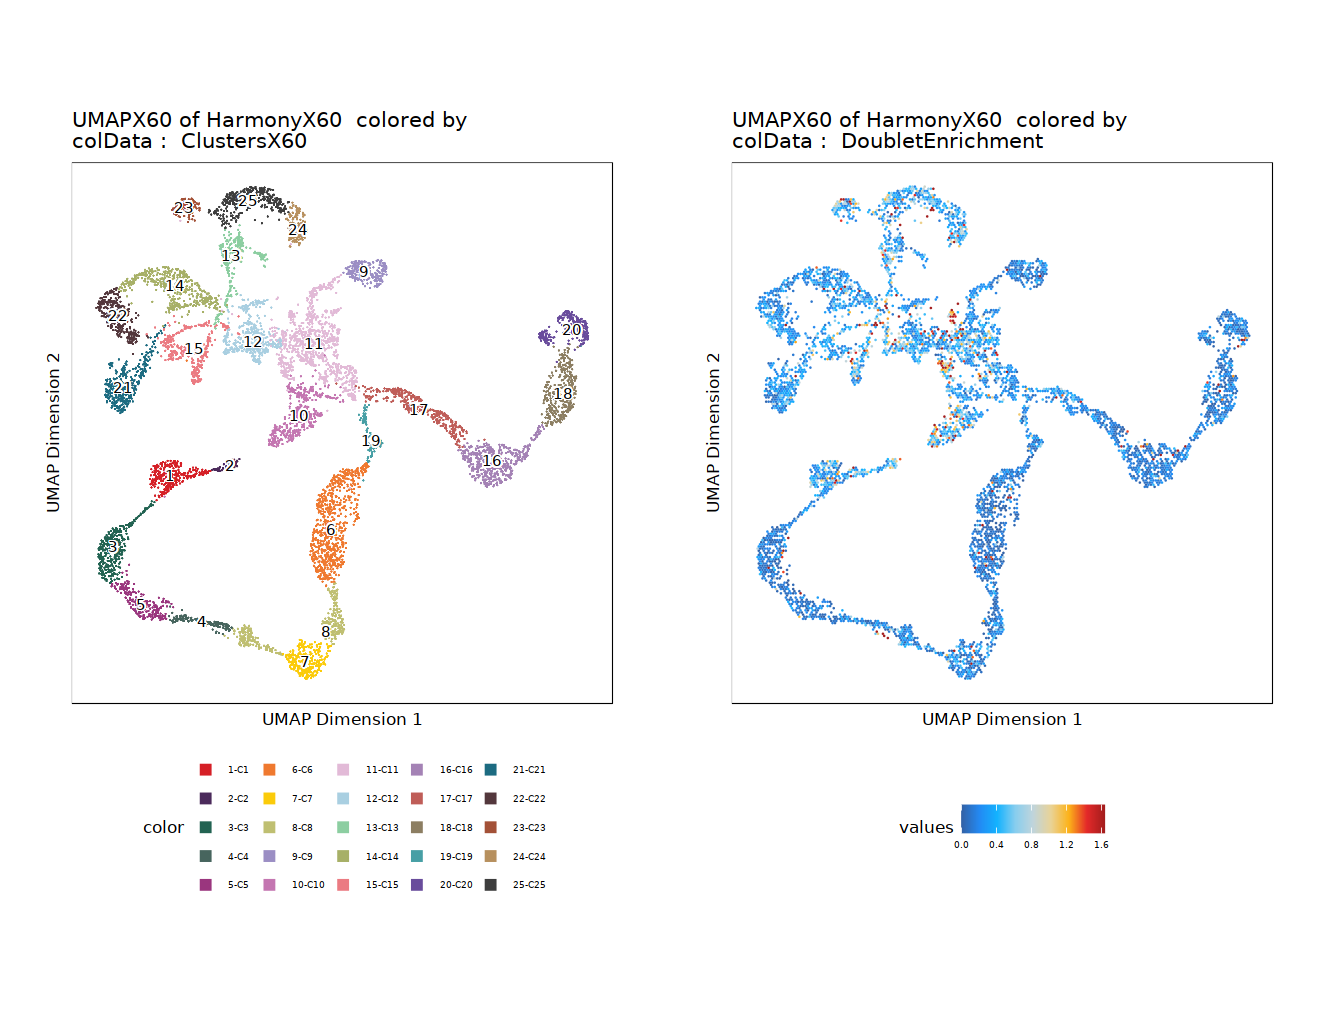

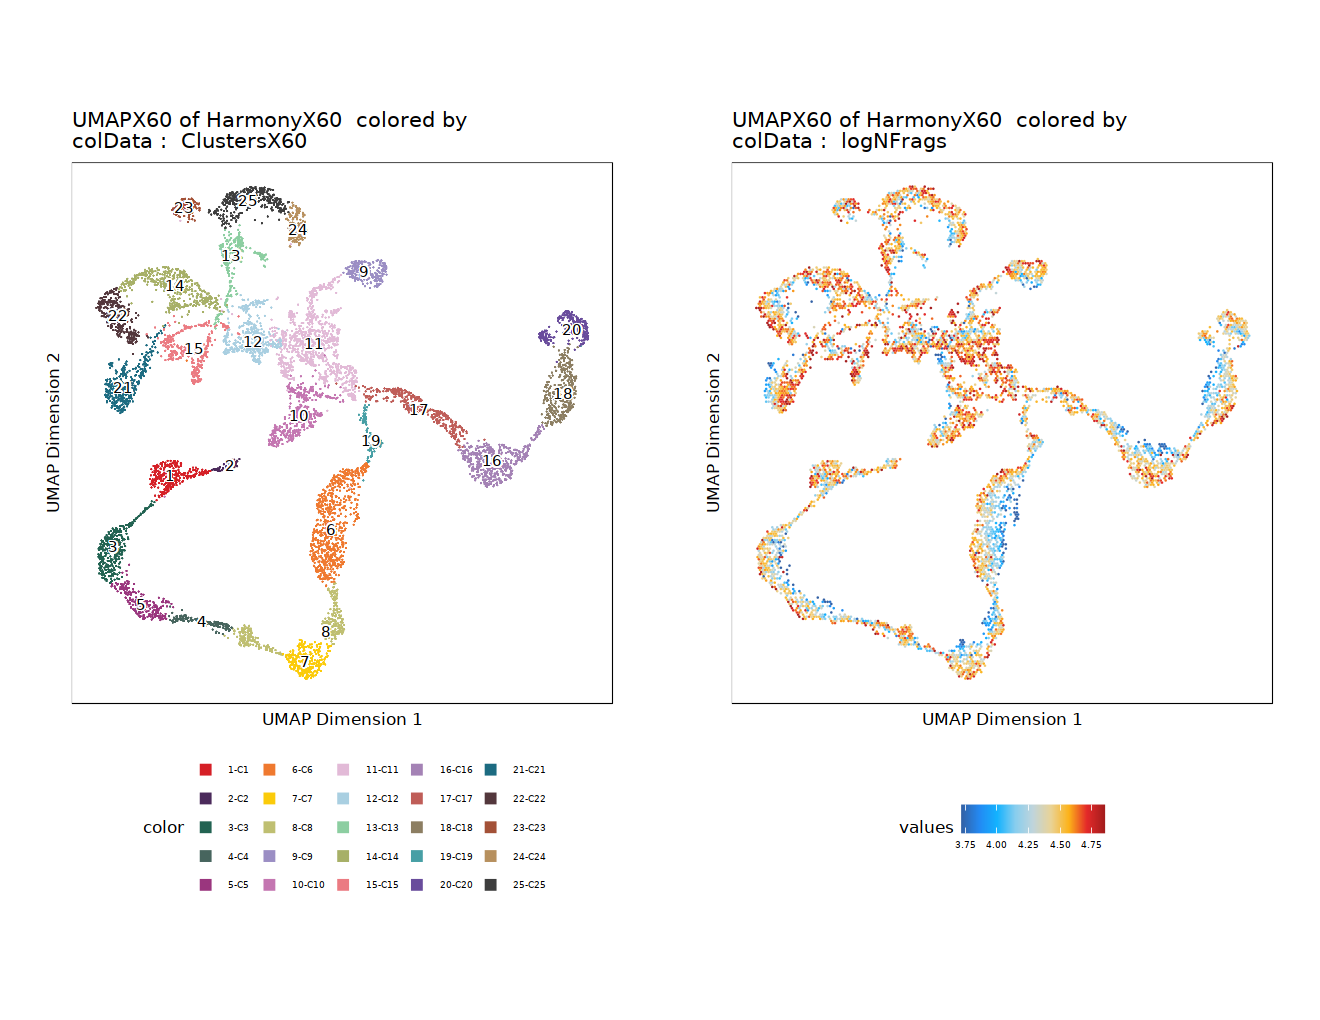

In [6]:
# make UMAP plots of
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersX60", embedding = "UMAPX60")
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAPX60")
ggAlignPlots(p1, p2, type = "h")


proj$logNFrags = log10(proj$nFrags)
p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "logNFrags", embedding = "UMAPX60")
ggAlignPlots(p1, p3, type = "h")

# Integrate with snRNA-seq from neuronal cell types

In [7]:
##########################
library(SingleCellExperiment)
neuron_data_sce = readRDS("/projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq/data/tidy_data/rdas/macaque_integrated_neuronsv3.sce.rds")

# counts actually natural logcounts, undo first, use `counts` as RNA thing to co-cluster
counts(neuron_data_sce) = 2.718 ^ logcounts(neuron_data_sce) - 1 
logcounts(neuron_data_sce) = NULL # so only 1 assay available

# has cluster_type data
table(neuron_data_sce$cluster_type)


  GLUT1   GLUT2   GLUT3   GLUT4   GLUT5   GLUT6   GLUT7   GLUT8   GLUT9  GLUT10 
    142     222     152      49     105     123     124      76      98      62 
 GLUT11   GABA1 GABA2_1 GABA2_2   GABA3 GABA4_1 GABA4_2   GABA5  midVen 
     89     109      65      71      74      91     100     202     744 

In [8]:
head(colData(neuron_data_sce))
table(colData(neuron_data_sce)$cell_type)



DataFrame with 6 rows and 21 columns
           Barcode Unnamed..0
          <factor>  <integer>
1 AAACCCAAGGATACGC          1
2 AAACCCAAGTAGGTTA          2
4 AAACGAAAGGTGATAT          4
5 AAACGAAGTACCAATC          5
7 AAACGAAGTCCTACGG          7
8 AAACGAAGTTGGGATG          8
                                                                                              Sample
                                                                                            <factor>
1 /projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P0/Solo.out/
2 /projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P0/Solo.out/
4 /projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P0/Solo.out/
5 /projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P0/Solo.out/
7 /projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P0/Solo.out/
8 /projects/pfen


 GLUT1  GLUT2  GLUT3  GLUT4  GLUT5  GLUT6  GLUT7  GLUT8  GLUT9 GLUT10 GLUT11 
   142    222    152     49    105    123    124     76     98     62     89 
 GABA1  GABA2  GABA3  GABA4  GABA5 midVen 
   109    136     74    191    202    744 

In [9]:
#####################################
# integration split by tissue region
proj = addGeneIntegrationMatrix(
  ArchRProj = proj, 
  useMatrix = "GeneScoreMatrix", 
  matrixName = "GeneIntegrationMatrix", 
  reducedDims = "HarmonyX60", 
  seRNA = neuron_data_sce, nGenes = 2000, 
  addToArrow = TRUE, plotUMAP = TRUE, 
  groupRNA = "cluster_type", 
  nameCell = "predictedCell_Co", 
  nameGroup = "predictedGroup_RNA2ATACCo", 
  nameScore = "predictedScore_RNA2ATACCo",
  force = TRUE)

proj = saveArchRProject(ArchRProj = proj)

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-36e32293bde27-Date-2022-07-18_Time-10-40-35.log
If there is an issue, please report to github with logFile!

2022-07-18 10:40:35 : Running Seurat's Integration Stuart* et al 2019, 0.005 mins elapsed.

2022-07-18 10:40:38 : Checking ATAC Input, 0.047 mins elapsed.

2022-07-18 10:40:55 : Checking RNA Input, 0.341 mins elapsed.

2022-07-18 10:41:01 : Found 21843 overlapping gene names from gene scores and rna matrix!, 0.433 mins elapsed.

2022-07-18 10:41:01 : Creating Integration Blocks, 0.433 mins elapsed.

2022-07-18 10:41:01 : Prepping Interation Data, 0.433 mins elapsed.

2022-07-18 10:41:03 : Computing Integration in 1 Integration Blocks!, 0 mins elapsed.

2022-07-18 10:41:03 : Block (1 of 1) : Computing Integration, 0 mins elapsed.

2022-07-18 10:41:04 : Block (1 of 1) : Identifying Variable Genes, 0.016 mins elapsed.

2022-07-18 10:41:07 : Block (1 of 1) : Getting GeneScoreMatrix, 0.071 mins elapsed.

2022-07-18 10:42:19 

.dropGroupsFromArrow : Adding SubGroups to Temp ArrowFile

.dropGroupsFromArrow : Move Temp ArrowFile to ArrowFile

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”
Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”
Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”
2022-07-18 10:52:35 : DH-4_SEA1346A4 (7 of 11) Adding GeneIntegrationMatrix to ArrowFile!, 11.536 mins elapsed.

2022-07-18 10:53:09 : DH-3_SEA1346A3 (8 of 11) Getting GeneIntegrationMatrix From TempFiles!, 12.096 mins elapsed.

.createArrowGroup : Arrow Group already exists! Dropping Group from ArrowFile! This will take ~10-30 seconds!

.dropGroupsFromArrow : Initializing Temp ArrowFile

.dropGroupsFromArrow : Adding Metadata to Temp ArrowFile

.dropGro

# Compare snATAC clusters w/ snRNA clusters

preClust,
GLUT7,C1
GLUT11,C10
midVen,C11
midVen,C12
GABA5,C13
GABA2_2,C14
GABA1,C15
GLUT3,C16
GLUT3,C17
GLUT5,C18


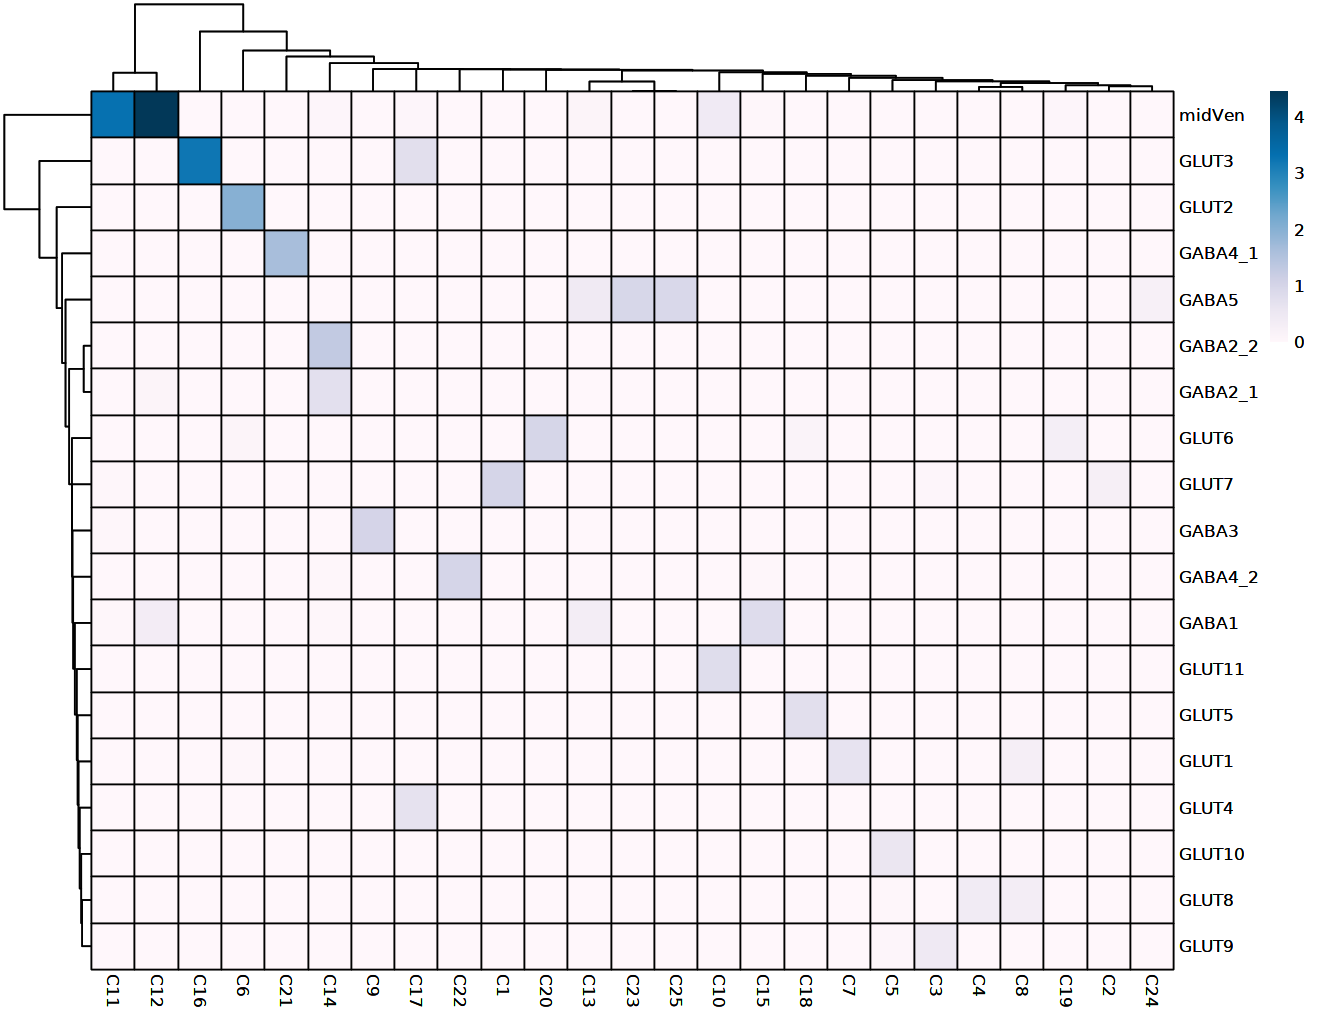

In [10]:
# plot the confusion matrix of cell types by predicted cell type clusters
cM <- confusionMatrix(paste0(proj$predictedGroup_RNA2ATACCo), paste0(proj$ClustersX60))
cM <- cM / Matrix::colSums(cM)
cM = cM[,order(colnames(cM))]
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

preClust <- rownames(cM)[apply(cM, 2 , which.max)]
cbind(preClust, colnames(cM)) #Assignments

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-36e32453df5a9-Date-2022-07-18_Time-10-57-30.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-36e32453df5a9-Date-2022-07-18_Time-10-57-30.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-36e3210961331-Date-2022-07-18_Time-10-57-31.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-36e3210961331-Date-2022-07-18_Time-10-57-31.log



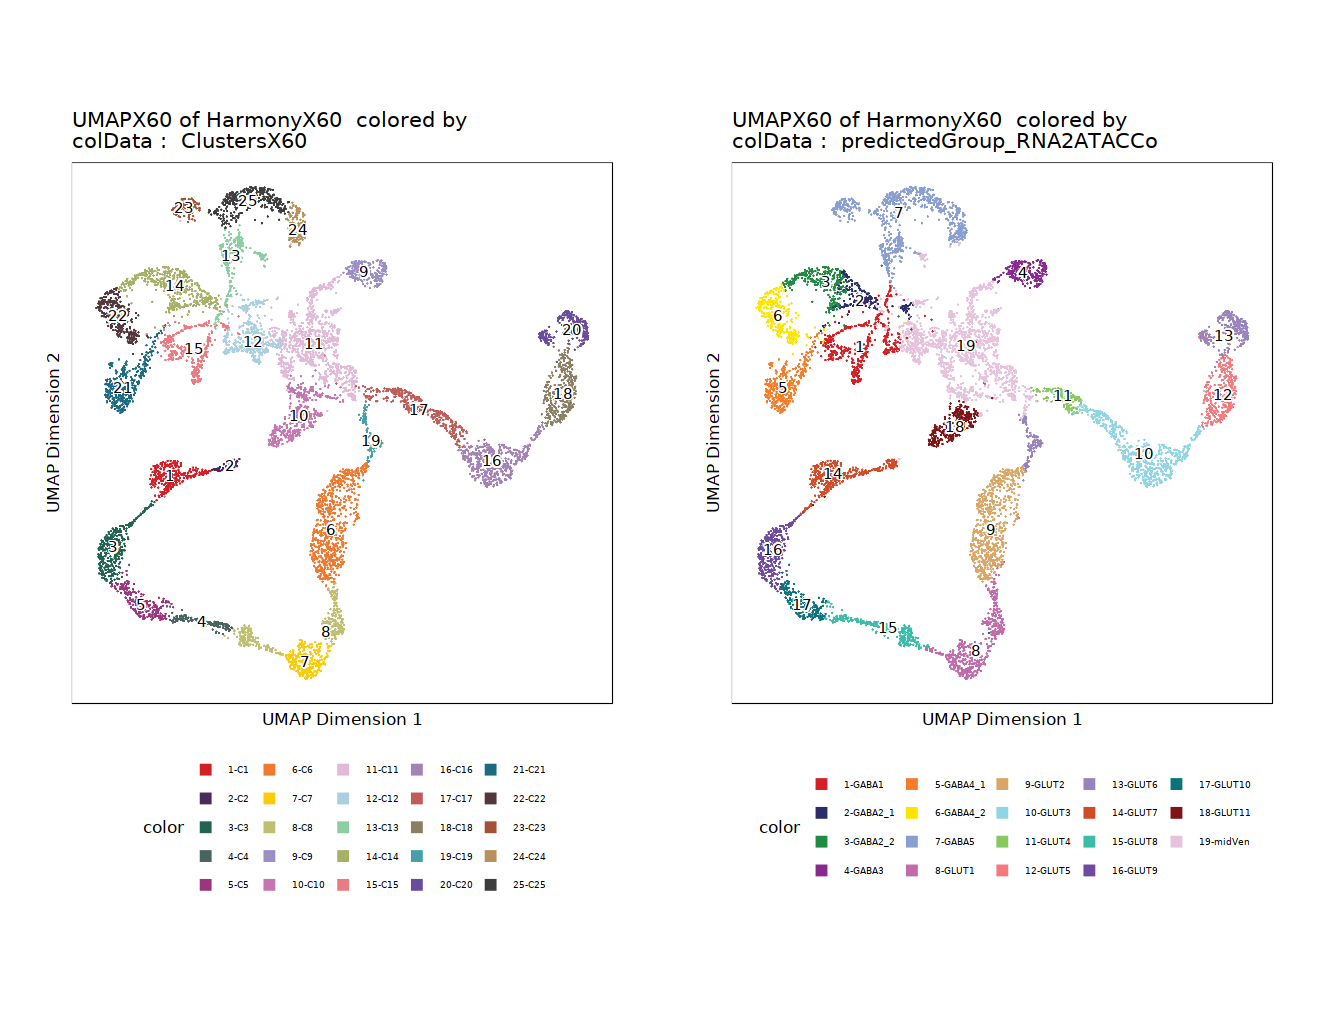

In [11]:
p2 <- plotEmbedding( proj, colorBy = "cellColData", name = "predictedGroup_RNA2ATACCo", embedding = "UMAPX60")
p3 <- plotEmbedding( proj, colorBy = "cellColData", name = "ClustersX60", embedding = "UMAPX60")

ggAlignPlots(p3, p2, type = "h")

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-36e325937034b-Date-2022-07-18_Time-10-59-42.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-07-18 10:59:43 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 


Imputing Matrix

Using weights on disk

1 of 2

2 of 2

Using weights on disk

1 of 2

2 of 2

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-36e325937034b-Date-2022-07-18_Time-10-59-42.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warnin

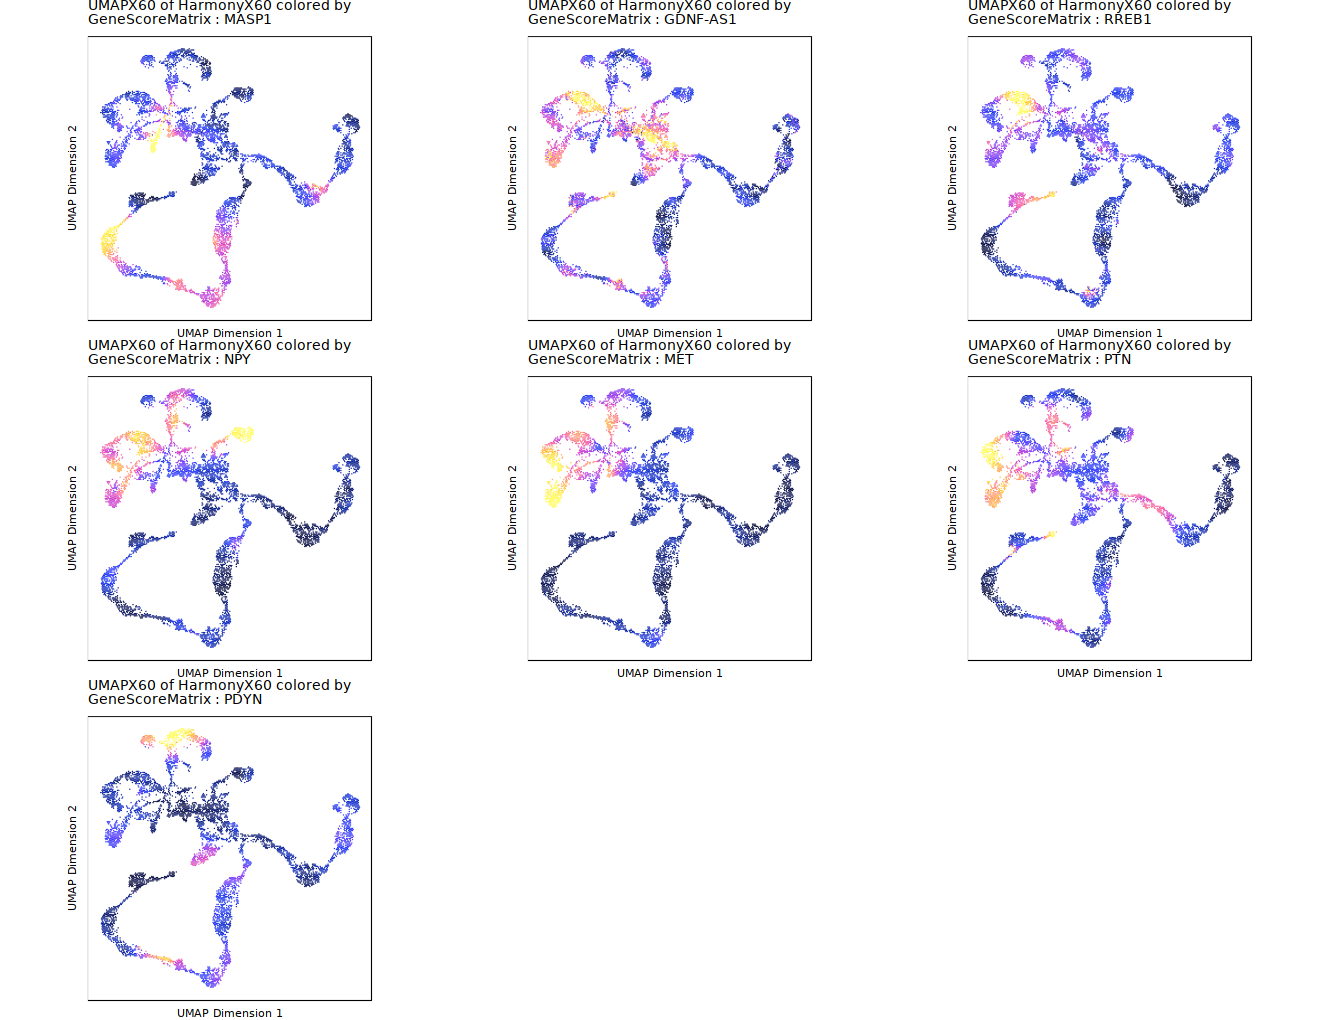

In [12]:
## Marker Genes for differentiation of Inhibitory Nuerons
markerGenes1  <- c('MASP1', # GABA 1
                   'GDNF-AS1', # GABA 2
                   'RREB1', # GABA 2
                   'NPY', # GABA 3
                   'MET', # GABA 4
                   'PTN', # GABA 4
                   'PDYN' # GABA 5
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPX60")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))




Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-36e327c2e35a9-Date-2022-07-18_Time-11-00-07.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-07-18 11:00:08 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 


Imputing Matrix

Using weights on disk

1 of 2

2 of 2

Using weights on disk

1 of 2

2 of 2

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-36e327c2e35a9-Date-2022-07-18_Time-11-00-07.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
War

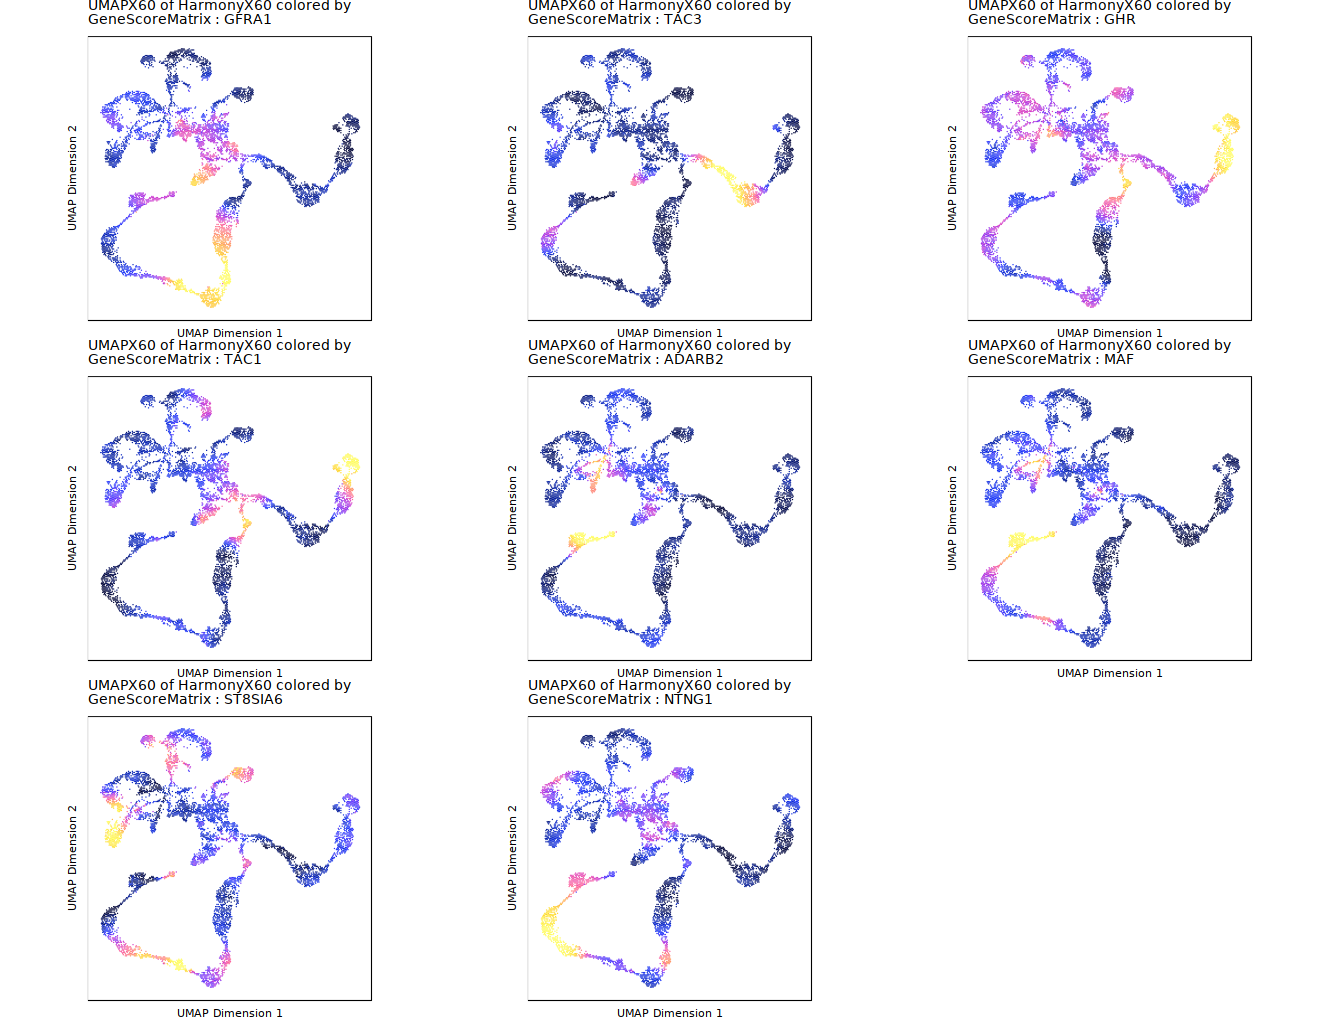

In [13]:
## Marker Genes for differentiation of Excitatory Neurons
markerGenes1  <- c('GFRA1', #GLUT 1,2
                   'TAC3', #GLUT 3,4
                   'GHR', #GLUT 5,6
                   'TAC1', #GLUT 6
                   'ADARB2', #GLUT 7-10 
                   'MAF', #GLUT 7
                   'ST8SIA6', #GLUT 8
                   'NTNG1' #GLUT 9,10
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPX60")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-36e325ecefa69-Date-2022-07-18_Time-11-00-45.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-07-18 11:00:46 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 


Imputing Matrix

Using weights on disk

1 of 2

2 of 2

Using weights on disk

1 of 2

2 of 2

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-36e325ecefa69-Date-2022-07-18_Time-11-00-45.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


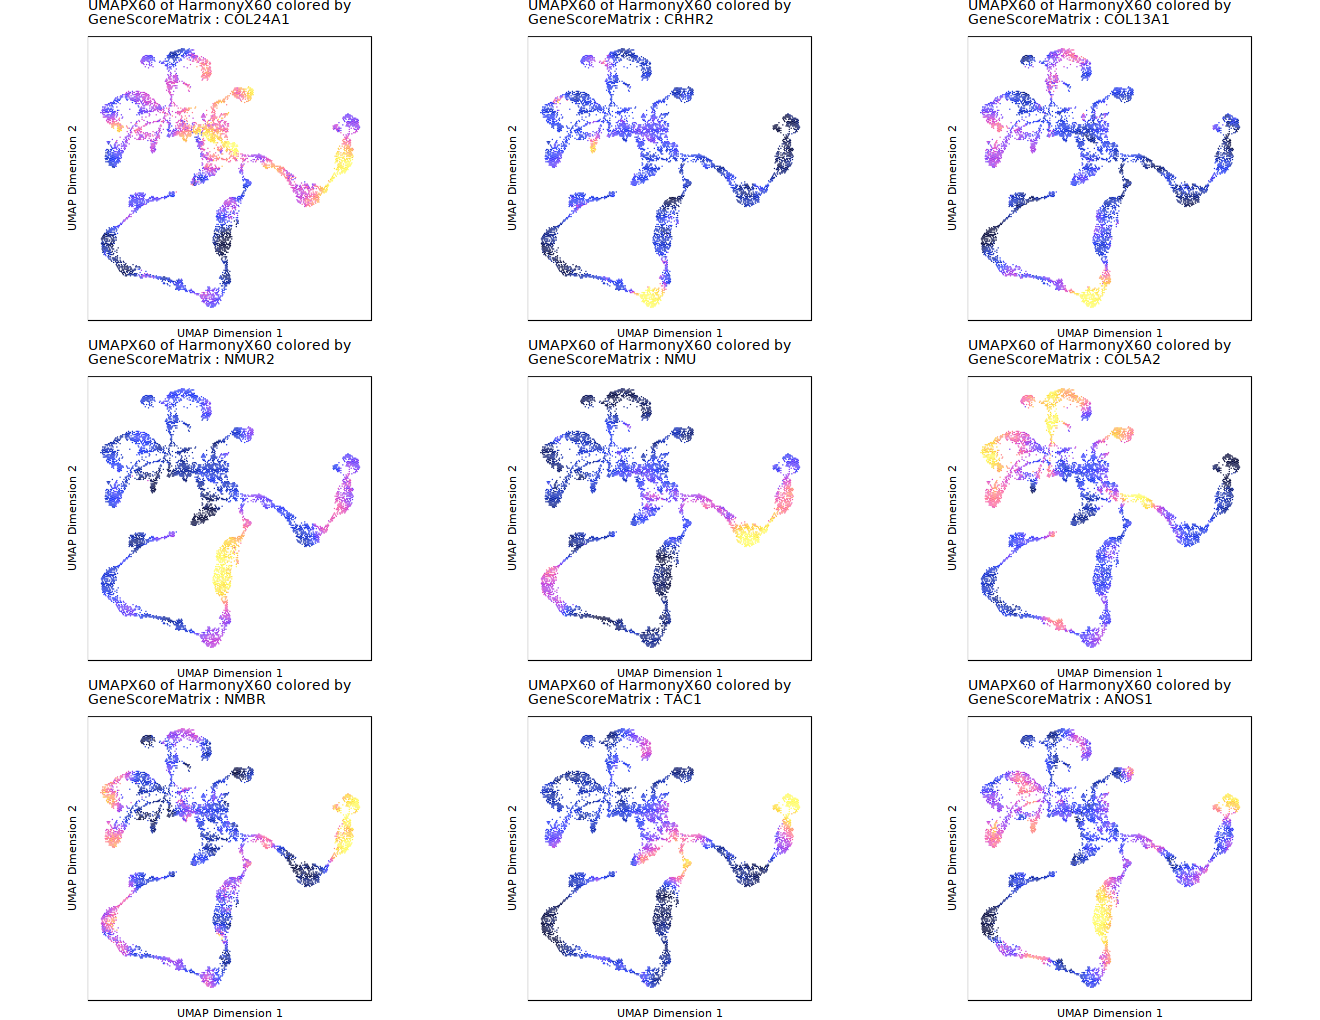

In [14]:
## Marker Genes for differentiation of Excitatory Neurons
markerGenes1  <- c('COL24A1', #GLUT 5
                   'CRHR2', #GLUT 1
                   'COL13A1', #GLUT 1
                   'NMUR2', #GLUT 2
                   'NMU', #GLUT 3
                   'COL5A2', #GLUT 4
                   'NMBR', #GLUT 5
                   'TAC1', #GLUT 6
                   'ANOS1' #GLUT 6
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPX60")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-36e326494ef99-Date-2022-07-18_Time-11-01-18.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-07-18 11:01:21 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 


Imputing Matrix

Using weights on disk

1 of 2

2 of 2

Using weights on disk

1 of 2

2 of 2

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-36e326494ef99-Date-2022-07-18_Time-11-01-18.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warnin

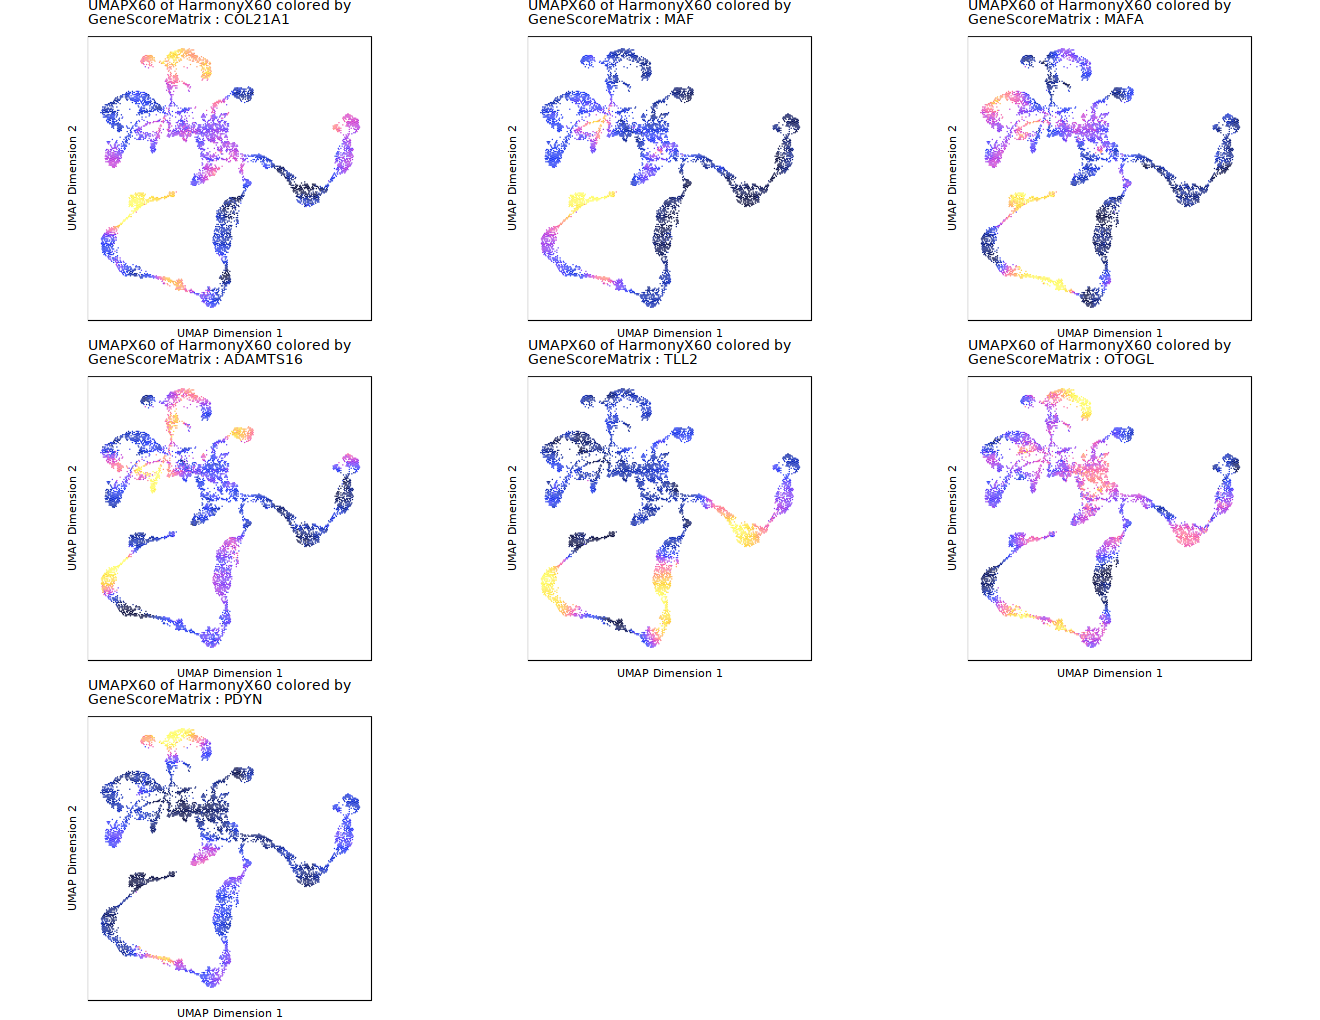

In [15]:
## Marker Genes for differentiation of Excitatory Neurons
markerGenes1  <- c('COL21A1', #GLUT 7
                   'MAF', #GLUT 7
                   'MAFA', #GLUT 8
                   'ADAMTS16', #GLUT 9
                   'TLL2', #GLUT 9
                   'OTOGL', #GLUT 10
                   'PDYN' #GLUT 11
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPX60")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

In [16]:
# drop the UNK cluster
idxSample <- BiocGenerics::which(proj$predictedGroup_RNA2ATACCo %ni% c('Drop'))
table(proj$predictedGroup_RNA2ATACCo[idxSample])
cellsSample <- proj$cellNames[idxSample]
proj = subsetCells(ArchRProj = proj, cellNames = cellsSample)
proj = saveArchRProject(ArchRProj = proj)


  GABA1 GABA2_1 GABA2_2   GABA3 GABA4_1 GABA4_2   GABA5   GLUT1  GLUT10  GLUT11 
    454     200     312     245     382     323     790     502     209     287 
  GLUT2   GLUT3   GLUT4   GLUT5   GLUT6   GLUT7   GLUT8   GLUT9  midVen 
    687     630     154     344     405     406     285     342    1576 

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

In [ ]:
# MAT <- getMatrixFromProject(
#   ArchRProj = proj,
#   useMatrix = "GeneScoreMatrix",
#   useSeqnames = NULL,
#   verbose = TRUE,
#   binarize = FALSE,
#   threads = getArchRThreads(),
#   logFile = createLogFile("getMatrixFromProject")
# )



In [ ]:
# table(proj$predictedGroup_Co)
